In [11]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt


In [12]:
data = genfromtxt ('advertising.csv', delimiter =',', skip_header =1)
print('data shape ',data.shape)
N = data.shape[0]
X = data [: ,:3]
print('X',X)
y = data [: ,3:]
print(y)
print(np.mean(X))

data shape  (200, 4)
X [[230.1  37.8  69.2]
 [ 44.5  39.3  45.1]
 [ 17.2  45.9  69.3]
 [151.5  41.3  58.5]
 [180.8  10.8  58.4]
 [  8.7  48.9  75. ]
 [ 57.5  32.8  23.5]
 [120.2  19.6  11.6]
 [  8.6   2.1   1. ]
 [199.8   2.6  21.2]
 [ 66.1   5.8  24.2]
 [214.7  24.    4. ]
 [ 23.8  35.1  65.9]
 [ 97.5   7.6   7.2]
 [204.1  32.9  46. ]
 [195.4  47.7  52.9]
 [ 67.8  36.6 114. ]
 [281.4  39.6  55.8]
 [ 69.2  20.5  18.3]
 [147.3  23.9  19.1]
 [218.4  27.7  53.4]
 [237.4   5.1  23.5]
 [ 13.2  15.9  49.6]
 [228.3  16.9  26.2]
 [ 62.3  12.6  18.3]
 [262.9   3.5  19.5]
 [142.9  29.3  12.6]
 [240.1  16.7  22.9]
 [248.8  27.1  22.9]
 [ 70.6  16.   40.8]
 [292.9  28.3  43.2]
 [112.9  17.4  38.6]
 [ 97.2   1.5  30. ]
 [265.6  20.    0.3]
 [ 95.7   1.4   7.4]
 [290.7   4.1   8.5]
 [266.9  43.8   5. ]
 [ 74.7  49.4  45.7]
 [ 43.1  26.7  35.1]
 [228.   37.7  32. ]
 [202.5  22.3  31.6]
 [177.   33.4  38.7]
 [293.6  27.7   1.8]
 [206.9   8.4  26.4]
 [ 25.1  25.7  43.3]
 [175.1  22.5  31.5]
 [ 89.7   9

In [13]:
# normalization 
def mean_normalization (X):
    N = len(X)
    maxi = np.max(X)
    mini = np.min(X)
    avg = np.mean(X)
    X = (X- avg) / (maxi - mini )
    X_b = np.c_[np.ones((N, 1)), X]
    return X_b , maxi , mini , avg

X_b , maxi , mini , avg = mean_normalization (X)
print(X_b)

[[ 1.00000000e+00  5.50426788e-01 -9.83586370e-02  7.57928475e-03]
 [ 1.00000000e+00 -7.57540486e-02 -9.32979082e-02 -7.37297571e-02]
 [ 1.00000000e+00 -1.67859312e-01 -7.10307018e-02  7.91666667e-03]
 [ 1.00000000e+00  2.85244602e-01 -8.65502699e-02 -2.85205803e-02]
 [ 1.00000000e+00  3.84097503e-01 -1.89451754e-01 -2.88579622e-02]
 [ 1.00000000e+00 -1.96536775e-01 -6.09092443e-02  2.71474359e-02]
 [ 1.00000000e+00 -3.18943995e-02 -1.15227733e-01 -1.46604251e-01]
 [ 1.00000000e+00  1.79644062e-01 -1.59762146e-01 -1.86752699e-01]
 [ 1.00000000e+00 -1.96874157e-01 -2.18803981e-01 -2.22515182e-01]
 [ 1.00000000e+00  4.48200067e-01 -2.17117072e-01 -1.54364035e-01]
 [ 1.00000000e+00 -2.87955466e-03 -2.06320850e-01 -1.44242578e-01]
 [ 1.00000000e+00  4.98469973e-01 -1.44917341e-01 -2.12393725e-01]
 [ 1.00000000e+00 -1.45592105e-01 -1.07467949e-01 -3.55431849e-03]
 [ 1.00000000e+00  1.03058367e-01 -2.00247976e-01 -2.01597503e-01]
 [ 1.00000000e+00  4.62707490e-01 -1.14890351e-01 -7.06933198e

C:\Users\Admin\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


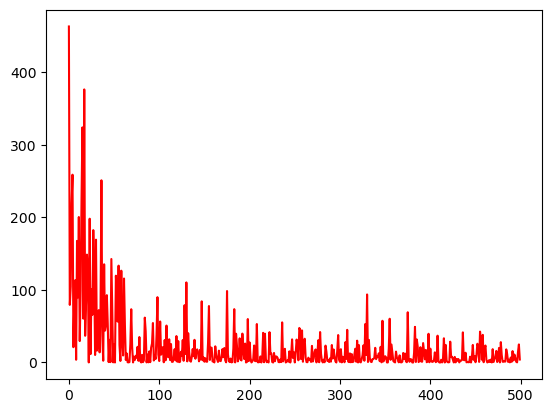

In [4]:
def predict(thetas,X):
    result = thetas.dot(X.T)
    return result
def gradient(y_hat,x,y):
    result = 2*x*(y_hat-y)
    return result

def stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.00001):

    # khởi tạo giá trị tham số
    # thetas = np.random.randn(4, 1) # thực tế các bạn nên bỏ comment dòng này
#     thetas = np.asarray([[1.16270837], [-0.81960489],  [1.39501033],  [0.29763545]])
#     thetas_path = [thetas] # chuyển thành array

    thetas = np.array([1.16270837, -0.81960489,1.39501033,0.29763545])

#     print('first_thetas',thetas)
    losses = []

    for epoch in range(n_epochs):
        for i in range(N):
            # lấy ngẫu nhiên 1 sample
            # random_index = np.random.randint(N) #thực tế các bạn nên sử dụng đoạn code này để index
            random_index = i # code này dành cho bài tập để kiểm thử đầu ra
            xi = X_b[random_index:random_index+1]
#             print('xi',xi)
#             yi = y[random_index:random_index+1]
            yi= y[i]
#             print('yi',yi)
            # tính output
            y_hat = predict(thetas,xi)
#             print('y_hat',y_hat)
            loss = (y_hat-yi)*(y_hat-yi)
#             print('loss',loss)
            dtheta = gradient(y_hat,xi,yi)
#             print('dtheta',dtheta)
            thetas = thetas - learning_rate*dtheta
#             print('thetas',thetas)
            losses.append(loss)
#             print(abc)

            #*********************************your code here**********************************

            # tính loss li

            #*********************************your code here**********************************


            # tính gradient cho loss
            #*********************************your code here**********************************


            # tính gradient
            #*********************************your code here**********************************


            # update giá trị theta
             #*********************************your code here**********************************


            # logging
             #*********************************your code here**********************************


    return thetas, losses

sgd_theta, losses = stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.01 )
# in loss cho 500 sample đầu
x_axis = list(range(500))
plt.plot(x_axis,losses[:500], color="r")
plt.show()

thetas.shape (4, 1)


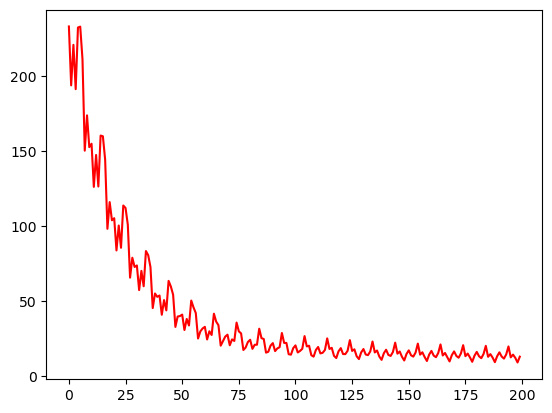

In [26]:
def mini_batch_gradient_descent(X_b, y, n_epochs=50,  minibatch_size = 20, learning_rate=0.01):

    # thetas = np.random.randn(4, 1)
    thetas = np.asarray([[1.16270837], [-0.81960489],  [1.39501033],  [0.29763545]])
    print('thetas.shape',thetas.shape)
    thetas_path = [thetas]
    losses = []

    for epoch in range(n_epochs):
        # shuffled_indices = np.random.permutation(N) # uncomment this code for real application

        shuffled_indices = np.asarray([21, 144, 17, 107, 37, 115, 167, 31, 3, 132, 179, 155, 36, 191, 182, 170, 27, 35, 162, 25, 28, 73, 172, 152, 102, 16, 185, 11, 1, 34, 177, 29, 96, 22, 76, 196, 6, 128, 114, 117, 111, 43, 57, 126, 165, 78, 151, 104, 110, 53, 181, 113, 173, 75, 23, 161, 85, 94, 18, 148, 190, 169, 149, 79, 138, 20, 108, 137, 93, 192, 198, 153, 4, 45, 164, 26, 8, 131, 77, 80, 130, 127, 125, 61, 10, 175, 143, 87, 33, 50, 54, 97, 9, 84, 188, 139, 195, 72, 64, 194, 44, 109, 112, 60, 86, 90, 140, 171, 59, 199, 105, 41, 147, 92, 52, 124, 71, 197, 163, 98, 189, 103, 51, 39, 180, 74, 145, 118, 38, 47, 174, 100, 184, 183, 160, 69, 91, 82, 42, 89, 81, 186, 136, 63, 157, 46, 67, 129, 120, 116, 32, 19, 187, 70, 141, 146, 15, 58, 119, 12, 95, 0, 40, 83, 24, 168, 150, 178, 49, 159, 7, 193, 48, 30, 14, 121, 5, 142, 65, 176, 101, 55, 133, 13, 106, 66, 99, 68, 135, 158, 88, 62, 166, 156, 2, 134, 56, 123, 122, 154])

        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(0, N, minibatch_size):
            xi = X_b_shuffled[i:i+minibatch_size]
            yi = y_shuffled[i:i+minibatch_size]
#             print('xi',xi)
#             print('xi.shape',xi.shape)
#             print('yi',yi)
#             print('yi.shape',yi.shape)
            
            # tính output
            oi = xi.dot(thetas)
#             print('oi',oi)
    
            # tính loss
            loss = (oi-yi)*(oi-yi)
#             print('loss',loss)


            # tính đạo hàm cho loss
            k= 2*(oi-yi)/minibatch_size
#             print('k',k)
#             print('k.shape',k.shape)
            # tính đạo hàm cho các tham số
            gradient_loss = xi.T.dot(k)
#             print('gradient_loss',gradient_loss)
#             print('gradient_shape',gradient_loss.shape)
#             print(abc)

            # cập nhật tham số
            thetas = thetas - learning_rate*gradient_loss
            
            loss_mean = np.sum(loss)/minibatch_size
            losses.append(loss_mean)

    return thetas_path, losses

mbgd_thetas, losses = mini_batch_gradient_descent(X_b, y, n_epochs=50,  minibatch_size = 20, learning_rate=0.01)

x_axis = list(range(200))
plt.plot(x_axis,losses[:200], color="r")
plt.show()

In [28]:
mbgd_thetas, losses = mini_batch_gradient_descent(X_b, y, n_epochs=50,  minibatch_size = 20, learning_rate=0.01)
print(round(sum(losses),2))

thetas.shape (4, 1)
11402.48


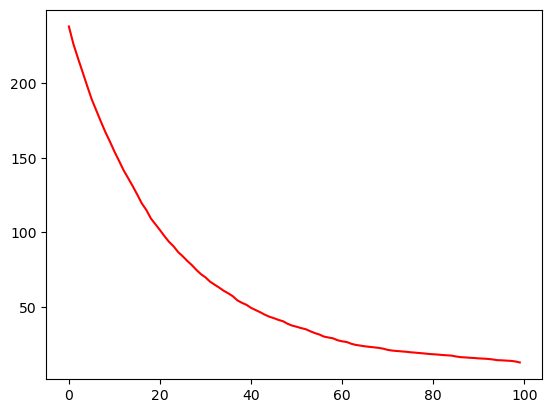

In [35]:
def batch_gradient_descent(X_b, y, n_epochs=100, learning_rate=0.01):

    # thetas = np.random.randn(4, 1) # uncomment this line for real application
    thetas = np.asarray([[1.16270837], [-0.81960489],  [1.39501033],  [0.29763545]])

    thetas_path = [thetas]
    losses = []
    N= len(X_b)
    for i in range(n_epochs):
            xi = X_b[i:i+N]
            yi = y[i:i+N]
#             print('xi',xi)
#             print('xi.shape',xi.shape)
#             print('yi',yi)
#             print('yi.shape',yi.shape)
            
            # tính output
            oi = xi.dot(thetas)
#             print('oi',oi)
#             print('oi.shpa',oi.shape)
    
            # tính loss
            loss = (oi-yi)*(oi-yi)
#             print('loss',loss)
#             print('loss.shape',oi.shape)


            # tính đạo hàm cho loss
            k= 2*(oi-yi)/N
#             print('k',k)
#             print('k.shape',k.shape)
            # tính đạo hàm cho các tham số
            gradient_loss = xi.T.dot(k)
#             print('gradient_loss',gradient_loss)
#             print('gradient_shape',gradient_loss.shape)
#             print(abc)

            # cập nhật tham số
            thetas = thetas - learning_rate*gradient_loss        
        
        
            mean_loss = np.sum(loss)/N
            losses.append(mean_loss)

    return thetas_path, losses

bgd_thetas, losses = batch_gradient_descent(X_b, y, n_epochs=100, learning_rate=0.01)

# in loss cho 100 sample đầu
x_axis = list(range(100))
plt.plot(x_axis,losses[:100], color="r")
plt.show()

In [36]:
bgd_thetas , losses = batch_gradient_descent (X_b , y, n_epochs =100 , learning_rate
=0.01)
print ( round ( sum( losses ) ,2))

6207.51
